# Chapter 4. Training Models

Project Goal: Linear Regression (輸出預測結果) v.s. Logistic Regression (輸出預測機率)

# 線性回歸 (Linear Regression)

預測方式：計算輸入特徵的加權總和，再加上一個偏差項（截距項）

y = θ0 + θ1 * x1 + θ2 * x2 + ...... + θn * xn.  y是預測值, xi是第i個特徵的值, θ0是偏差項, θi是第i個模型參數

也就是 y = hθ(x) = θ ⋅ x = θ dot x. θ為參數向量(θ0~θn)

其均方誤差 MSE(X, hθ) = (1/m) * Σ (θ^T ⋅ xi - yi)^2

# Normal Equation(正規方程式)

θ 是可將可將代價函數最小化的值, θ = (X^T ⋅ X)^(-1) ⋅ X^T ⋅ y, y是目標值向量

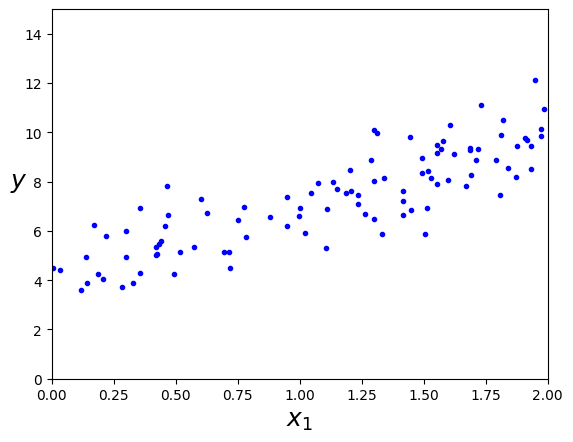

In [2]:
# 隨機產生線性資料組
import numpy as np
import matplotlib.pyplot as plt

# rand / randn: 0~1的數, rand(a, b) 代表 回傳 ａ＊ｂ大小的矩陣
X = 2 * np.random.rand(100, 1)
# y = 4 + 3 * x1 + 高斯雜訊
y = 4 + 3 * X + np.random.randn(100, 1)

plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([0, 2, 0, 15])
plt.show()

In [4]:
# 算出最佳θ值

# np.c_[A, B]: 將A, B兩個矩陣左右串接在一起
# np.linalg.inv: numpy.linear_algebra.inversion, 逆矩陣
X_b = np.c_[np.ones((100, 1)), X]                               # 為每個實例加上X0 = 1, 所以 X_b.shape = (100, 2)
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)    # 即 θ = (X^T ⋅ X)^(-1) ⋅ X^T ⋅ y
print("theta_best = ", theta_best)

# 此時得到的結果為 θ0 = 4.127, θ1 = 2.848, 與原先設定的 θ0 = 4, θ1 = 3 不同, 因為受到高斯雜訊的影響

theta_best =  [[4.12793996]
 [2.84830951]]


predict:  [[4.12793996]
 [9.82455898]]


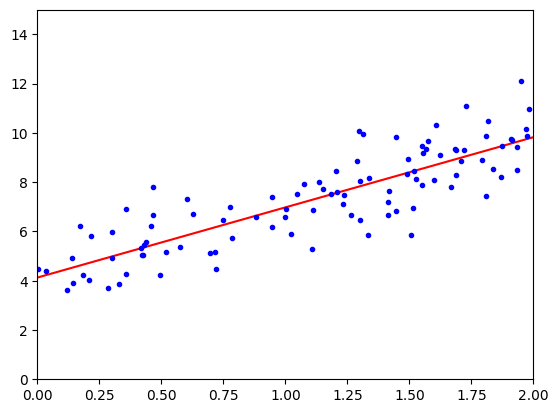

In [11]:
# 畫出模型預測
X_new = np.array([[0], [2]])                # X_new.shape = (2, 1), X_new = [[0] , X_new_b = [[1 0]
X_new_b = np.c_[np.ones((2, 1)), X_new]     #                                [2]]             [1 2]]
y_predict = X_new_b.dot(theta_best)
print("predict: ", y_predict)
plt.plot(X_new, y_predict, "r-")
plt.plot(X, y, "b.")
plt.axis([0, 2, 0, 15])
plt.show()

In [14]:
# 利用線性回歸找出θ值(模型參數)
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)
print("Interception(θ0, 偏差項):     ", lin_reg.intercept_)
print("Coefficient(θ1~θn, 特徵權重): ", lin_reg.coef_)

# 補充：LinearRegression 其實是 based on scipy.linalg.lstsq (least squares 最小平方)
# 這裡有點難懂, 詳細見參考書 p. 114

Interception(θ0, 偏差項):      [4.12793996]
Coefficient(θ1~θn, 特徵權重):  [[2.84830951]]


# Gradient Descent (梯度下降)

反覆調整參數來將代價函數最小化

注意：在使用 Gradient Descent 時, 應該確保所有特徵都具有相同尺度（standardize）, 否則收斂所需時間會長很多

# Batch Gradient Descent (BGD, 批次梯度下降)

偏微分(偏導數)：計算在稍微調整θ後, 代價函數會改變多少 (即 ∂MSE / ∂θ)

而每次訓練時, 都會使用整個訓練組的實例來計算梯度

故 ∇ MSE(θ) = (∂MSE(θ) / ∂θ0, ∂MSE(θ) / ∂θ1, ∂MSE(θ) / ∂θ2......) = (2 / n) * X^T ⋅ (X ⋅ θ - y)

當梯度向量指向山頂時, 我們就應該往山腳走, 所以 新的θ 應該跟 MSE(θ) 反向, 且利用 η (learning rate) 調整步伐大小

故 θ_new = θ - η ∇ MSE(θ)

In [18]:
eta = 0.1                       # learning rate
n_iterations = 1000
m = 100                         # 即 實例數
theta = np.random.randn(2, 1)   # 先隨機挑選 θ 的初始值

for i in range(n_iterations):
    gradients = 2 / m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradients

print("After 1000 iters, θ = \n", theta)

# 注意：此時找出的結果與上面正規方程式的一模一樣！代表梯度下降的很完美(模型是很單純的曲線)

After 1000 iters, θ = 
 [[4.12793996]
 [2.84830951]]


如何設定 learning rate 的大小

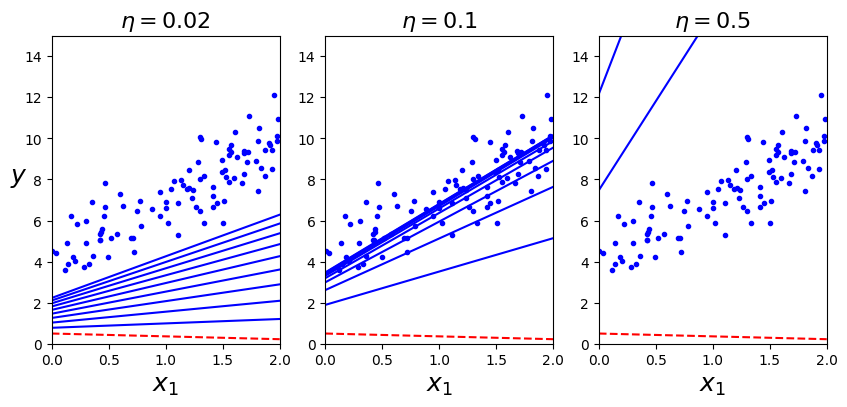

In [19]:
theta_path_bgd = []

def plot_gradient_descent(theta, eta, theta_path=None):
    m = len(X_b)
    plt.plot(X, y, "b.")
    n_iterations = 1000
    for iteration in range(n_iterations):
        if iteration < 10:
            y_predict = X_new_b.dot(theta)
            style = "b-" if iteration > 0 else "r--"
            plt.plot(X_new, y_predict, style)
        gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
        theta = theta - eta * gradients
        if theta_path is not None:
            theta_path.append(theta)
    plt.xlabel("$x_1$", fontsize=18)
    plt.axis([0, 2, 0, 15])
    plt.title(r"$\eta = {}$".format(eta), fontsize=16)

np.random.seed(42)
theta = np.random.randn(2,1)  # random initialization

plt.figure(figsize=(10,4))
plt.subplot(131); plot_gradient_descent(theta, eta=0.02)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.subplot(132); plot_gradient_descent(theta, eta=0.1, theta_path=theta_path_bgd)
plt.subplot(133); plot_gradient_descent(theta, eta=0.5)
plt.show()

# 下圖中, 虛線代表起點
# 左邊學習速度太低了, 而右邊學習速度太高, 導致不斷跳來跳去

如何設定 iterations 的大小

可以設定很大的 iteration, 但當梯度向量變小到一定的值(tolerance, 容限數)時就停下來（切線斜率趨近於零時代表接近谷底了）

# Stochastic Gradient Descent (SGD, 隨機梯度下降)

為改善BGD每次都會使用整個訓練組來計算梯度所以普遍速度較慢的問題, 故 SGD每次只選出一個實例, 並只用他計算梯度

但缺點是 cost function 會上下跳動, 而不是像 BGD 一樣平穩的到達最小值, 但此點也讓他利於跳出局部最小值！

# Annealing (退火)

改善 SGD 不會停在最小值的方法, 就是在一開始用較大的learning rate, 使其跳出局部最小值, 再將learning rate修小, 盡可能接近全域最小值

theta:
 [[4.11888002]
 [2.86447253]]


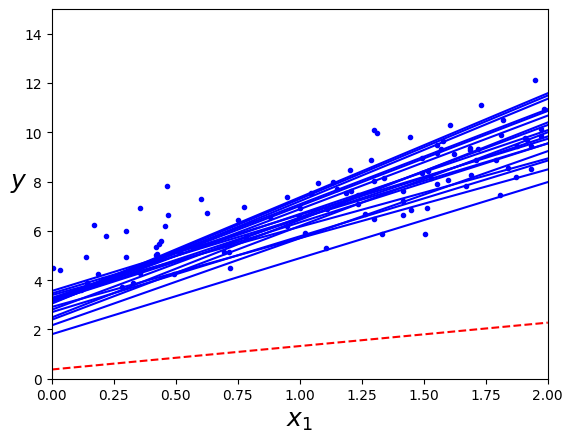

In [22]:
# 隨機梯度下降
theta_path_sgd = []
m = len(X_b)
np.random.seed(42)

n_epochs = 50
theta = np.random.rand(2, 1)
t0, t1 = 5, 50               # learning schedule, 在每個 iteration 後會決定 learning rate
def learning_schedule(t):
    return t0 / (t + t1)

for epoch in range(n_epochs):
    for i in range(m):
        if epoch == 0 and i < 20:
            y_predict = X_new_b.dot(theta)
            style = "b-" if i > 0 else "r--"
            plt.plot(X_new, y_predict, style)
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * m + i)
        theta = theta - eta * gradients
        theta_path_sgd.append(theta)

print("theta:\n", theta)

plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([0, 2, 0, 15])
plt.show()

# 可以跟上面 BGD 的圖對比, 就可以看出 SGD 不會穩定規律地往最小值前進, 而是不規則的更動

In [24]:
from sklearn.linear_model import SGDRegressor
# tol: tolerance, penalty: 正則化
sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3, penalty=None, eta0=0.1)
# .ravel() 會 return faltten 的 1-D array
sgd_reg.fit(X, y.ravel())

print("Interception(θ0, 偏差項):     ", sgd_reg.intercept_)
print("Coefficient(θ1~θn, 特徵權重): ", sgd_reg.coef_)

Interception(θ0, 偏差項):      [4.12494671]
Coefficient(θ1~θn, 特徵權重):  [2.89273141]


# Mini-batch Gradient Descent (小批次梯度下降)

每一步用隨機的一小組實例(mini-batch)來計算梯度, 故參數的移動不會像SGD那麼不規則, 但仍可能無法逃脫局部最小值

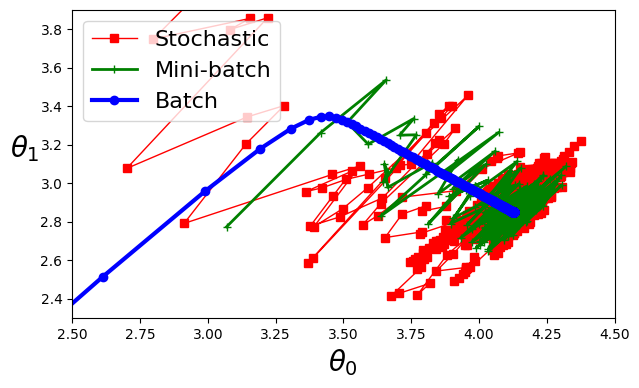

In [25]:
theta_path_mgd = []

n_iterations = 50
minibatch_size = 20

np.random.seed(42)
theta = np.random.randn(2,1)  # random initialization

t0, t1 = 200, 1000
def learning_schedule(t):
    return t0 / (t + t1)

t = 0
for epoch in range(n_iterations):
    shuffled_indices = np.random.permutation(m)
    X_b_shuffled = X_b[shuffled_indices]
    y_shuffled = y[shuffled_indices]
    for i in range(0, m, minibatch_size):
        t += 1
        xi = X_b_shuffled[i:i+minibatch_size]
        yi = y_shuffled[i:i+minibatch_size]
        gradients = 2/minibatch_size * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(t)
        theta = theta - eta * gradients
        theta_path_mgd.append(theta)

theta_path_bgd = np.array(theta_path_bgd)
theta_path_sgd = np.array(theta_path_sgd)
theta_path_mgd = np.array(theta_path_mgd)

plt.figure(figsize=(7,4))
plt.plot(theta_path_sgd[:, 0], theta_path_sgd[:, 1], "r-s", linewidth=1, label="Stochastic")
plt.plot(theta_path_mgd[:, 0], theta_path_mgd[:, 1], "g-+", linewidth=2, label="Mini-batch")
plt.plot(theta_path_bgd[:, 0], theta_path_bgd[:, 1], "b-o", linewidth=3, label="Batch")
plt.legend(loc="upper left", fontsize=16)
plt.xlabel(r"$\theta_0$", fontsize=20)
plt.ylabel(r"$\theta_1$   ", fontsize=20, rotation=0)
plt.axis([2.5, 4.5, 2.3, 3.9])
plt.show()

# 由下圖可以看出, mini-batch 會比 SGD 的跳動幅度還小, 但仍然很不穩定
# 但無論是 正規方程式、SVD、GD、SGD、mini-batch , 這些演算法在訓練結束時幾乎都沒有差異, 因為都是相似的模型, 且都以同樣的方式進行預測

# Polynomial Regression (多項式回歸)

加入各個特徵的次方來作為新特徵, 再用線性模型來 fit

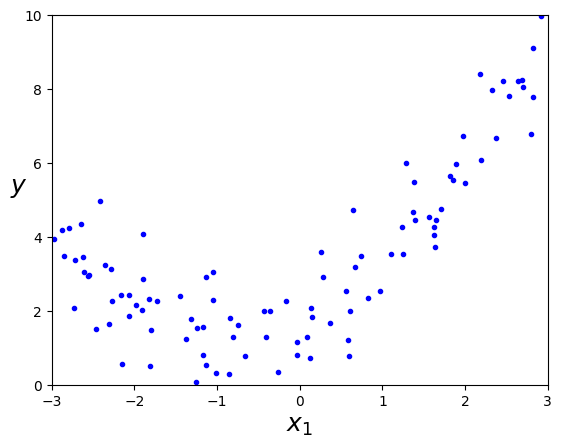

In [26]:
# 以簡單的二次多項式為例: y = 0.5 * x^2 + x + 2

import numpy as np
import numpy.random as rnd

np.random.seed(42)
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([-3, 3, 0, 10])
plt.show()

In [27]:
# 顯然, 上圖中的資料無法以單純的直線來fit, 故使用 PolynomialFeatures 來轉換資料
from sklearn.preprocessing import PolynomialFeatures
# degree: 最高次項的次方數, include_bias: 加入 intercept 項
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)
print("X[0] =", X[0], ", and its degree =", X_poly[0])

# 此結果代表: 第0項特徵的數值是 -0.75275929, 而該特徵的係數為 0.56664654

X[0] = [-0.75275929] , and its degree = [-0.75275929  0.56664654]


In [29]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
print("Interception(θ0, 偏差項):     ", lin_reg.intercept_)
print("Coefficient(θ1~θn, 特徵權重): ", lin_reg.coef_)
# 也就是, 原先的多項式: y = 0.5  * x1^2 +        x1 + 2
# 而模型預測出來的是:   y = 0.56 * x1^2 + 0.93 * x1 + 1.78

Interception(θ0, 偏差項):      [1.78134581]
Coefficient(θ1~θn, 特徵權重):  [[0.93366893 0.56456263]]


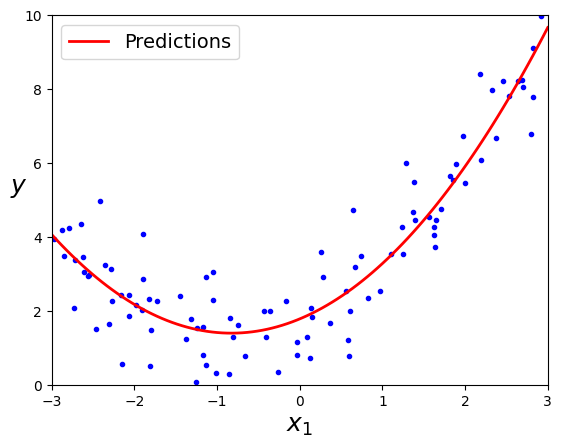

In [30]:
# 疊回原圖
X_new=np.linspace(-3, 3, 100).reshape(100, 1)
X_new_poly = poly_features.transform(X_new)
y_new = lin_reg.predict(X_new_poly)
plt.plot(X, y, "b.")
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([-3, 3, 0, 10])
plt.show()

多項式的 degree 應該挑多少？

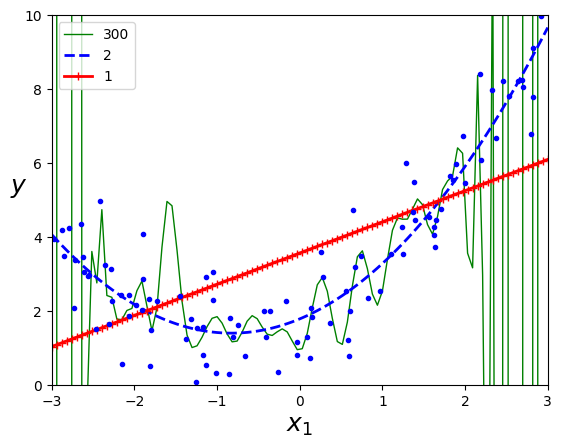

In [31]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# 綠色是 degree = 300, 藍色是 degree = 2, 紅色是 degree = 1
for style, width, degree in (("g-", 1, 300), ("b--", 2, 2), ("r-+", 2, 1)):
    polybig_features = PolynomialFeatures(degree=degree, include_bias=False)
    std_scaler = StandardScaler()
    lin_reg = LinearRegression()
    polynomial_regression = Pipeline([
            ("poly_features", polybig_features),
            ("std_scaler", std_scaler),
            ("lin_reg", lin_reg),
        ])
    polynomial_regression.fit(X, y)
    y_newbig = polynomial_regression.predict(X_new)
    plt.plot(X_new, y_newbig, style, label=str(degree), linewidth=width)

plt.plot(X, y, "b.", linewidth=3)
plt.legend(loc="upper left")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([-3, 3, 0, 10])
plt.show()

# 由下圖可見, degree = 300 會太過於 overfit, degree = 1 又太過簡單
# 因為原先的資料就是用 degree = 2 產生的, 所以 degree = 2 的效果最好
# 但在未知的情況下, 該如何挑選？

學習曲線

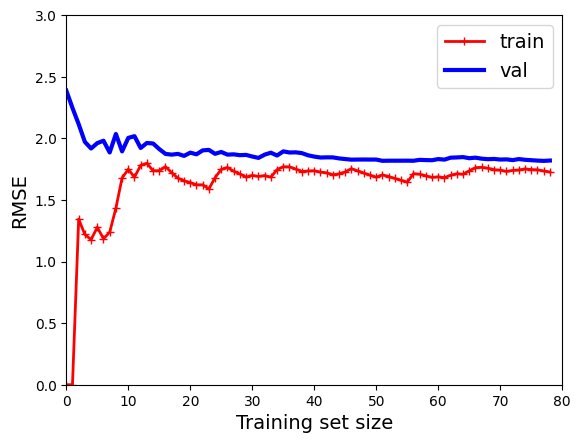

In [33]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curve(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.2, random_state=10)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_predict))
    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
    plt.plot(np.sqrt(val_errors),  "b-",   linewidth=3, label="val")
    plt.legend(loc="upper right", fontsize=14)
    plt.xlabel("Training set size", fontsize=14)
    plt.ylabel("RMSE", fontsize=14)

lin_reg = LinearRegression()
plot_learning_curve(lin_reg, X, y)
plt.axis([0, 80, 0, 3])
plt.show()

# 當圖中 train, val 曲線很接近時, 代表模型大致收斂了
# 下圖的曲線是很典型的 underfitting, 因為無論是 train_set, val_set 的 RMSE 都還是很高
# 所以看到這個圖應該, 應該使用更複雜的模型, 或找出更好的特徵

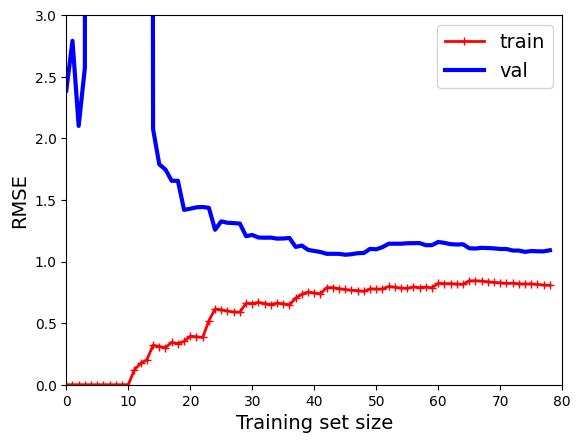

In [36]:
# 試試看將 degree 拉高至 10
from sklearn.pipeline import Pipeline

polynomial_regression = Pipeline([
    ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
    ("lin_reg", LinearRegression()),
])

plot_learning_curve(polynomial_regression, X, y)
plt.axis([0, 80, 0, 3])
plt.show()

# 若 degree=10, 可以從下圖觀察到兩件事：
# (1) train 及 val 的 RMSE 都比原先小很多, 看起來不錯
# (2) 但是兩條曲線中有一段距離, 模型處理 train資料 比 val資料 還要好很多, 代表發生 overfitting 了
# 所以我們的目標是, RMSE 都小的同時, train 及 val 曲線也要很接近

# 模型推測之三種誤差
1. bias(偏差): 由錯誤的假設造成, ex: 假設資料是二次的, 但以一次模型去 fit
2. variance(變異度): 對於資料的細節過度敏感, ex: 高次多項式的模型容易有 overfitting 的情況
3. irreducible error(不可還原誤差): 由資料本身的雜訊造成

-> 增加模型的複雜度會減少 bias, 但同時也增加variance, 故 需要有所權衡

# Regularized Linear Models: 降低多項式次數來約束模型overfitting

# Ridge Regression (山嶺回歸, Tikhonov 正則化)

透過加入 α * (1/2) * Σ θi^2 的正則化項(懲罰項), 來讓模型不會那麼擬合 traing data (權重向量是 l2 norm平方的一半)

代價函數 J(θ) = MSE(θ) + α * (1/2) * Σ θi^2,  其中 α 控制模型正則化的程度 (α=0 時其實就是線性)

此時參數向量 θ = (X^T ⋅ X + α * A)^(-1) ⋅ X^T ⋅ y

P.S: 在執行 ridge regression 前一定要 standardize !

Ridge Regression: predict = [[1.55071465]]


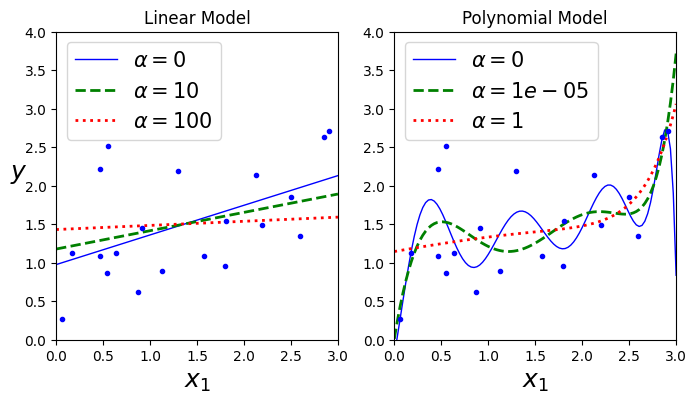

In [43]:
# 在 線性模型 與 多項式模型 上看看 ridge regression 的效果
from sklearn.linear_model import Ridge

np.random.seed(42)
m = 20
X = 3 * np.random.rand(m, 1)
y = 1 + 0.5 * X + np.random.randn(m, 1) / 1.5
X_new = np.linspace(0, 3, 100).reshape(100, 1)

# 以 Andre-Louis Cholesky 矩陣分解技術 來實作 ridge regression
ridge_reg = Ridge(alpha=1, solver="cholesky", random_state=42)
ridge_reg.fit(X, y)
print("Ridge Regression: predict =", ridge_reg.predict([[1.5]]))

def plot_model(model_class, polynomial, alphas, **model_kargs):
    for alpha, style in zip(alphas, ("b-", "g--", "r:")):
        model = model_class(alpha, **model_kargs) if alpha > 0 else LinearRegression()
        # 在多項式模型中, 先以 degree=10 來處理資料, 再以 StandardScaler 調整資料尺度
        if polynomial:
            model = Pipeline([
                    ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
                    ("std_scaler", StandardScaler()),
                    ("regul_reg", model),
                ])
        model.fit(X, y)
        y_new_regul = model.predict(X_new)
        lw = 2 if alpha > 0 else 1
        plt.plot(X_new, y_new_regul, style, linewidth=lw, label=r"$\alpha = {}$".format(alpha))
    plt.plot(X, y, "b.", linewidth=3)
    plt.legend(loc="upper left", fontsize=15)
    plt.xlabel("$x_1$", fontsize=18)
    plt.axis([0, 3, 0, 4])

plt.figure(figsize=(8,4))
plt.subplot(121)
plot_model(Ridge, polynomial=False, alphas=(0, 10, 100), random_state=42)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.title("Linear Model")
plt.subplot(122)
plot_model(Ridge, polynomial=True, alphas=(0, 10**-5, 1), random_state=42)
plt.title("Polynomial Model")
plt.show()

# 從兩圖皆可看出, 增加 α, 會導致預測曲線更平坦、更不極端, 因此可以減少模型的變異度, 降低 overfitting

# Lasso Regression (Least Absolute Shrinkage and Selection Operator)

透過加入 α * Σ |θi| 的正則化項(懲罰項), 來讓模型不會那麼擬合 traing data (權重向量是 l1 norm)

代價函數 J(θ) = MSE(θ) + α * Σ |θi|,  其中 α 控制模型正則化的程度 (α=0 時其實就是線性)

/Users/chenyanting/Desktop/Machine Learning Study/my_env/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.803e+00, tolerance: 9.295e-04
  model = cd_fast.enet_coordinate_descent(


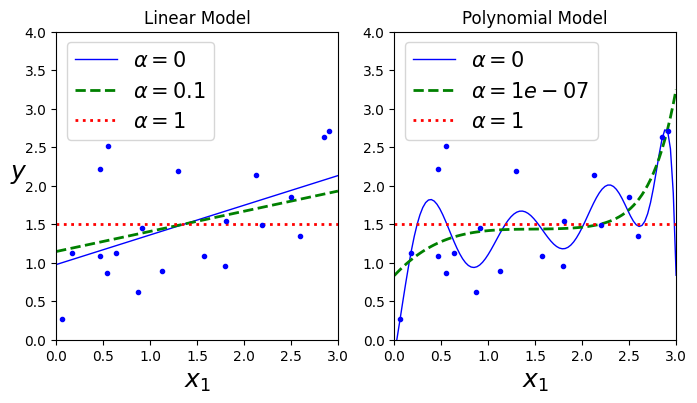

In [41]:
from sklearn.linear_model import Lasso

plt.figure(figsize=(8,4))
plt.subplot(121)
plot_model(Lasso, polynomial=False, alphas=(0, 0.1, 1), random_state=42)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.title("Linear Model")
plt.subplot(122)
plot_model(Lasso, polynomial=True, alphas=(0, 10**-7, 1), random_state=42)
plt.title("Polynomial Model")
plt.show()

In [42]:
# Lasso Regression v.s. Ridge Regression
# 很難懂, 在 p.134~135, 有空再回來深入研究

from sklearn.linear_model import Lasso

lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X, y)
print("Lasso Regression: predict =", lasso_reg.predict([[1.5]]))

Lasso Regression: predict = [1.53788174]


# Elastic Net (彈性網路)

就是 Ridge Regression 與 Lasso Regression 的混合

代價函數 J(θ) = MSE(θ) + r * α * Σ |θi| + [(1 - r) / 2] * α * Σ θi^2,  其中 r 代表 ridge 與 lasso 之間的權重比例

In [44]:
from sklearn.linear_model import ElasticNet

elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5)
elastic_net.fit(X, y)
print("Elastic Net: predict =", elastic_net.predict([[1.5]]))

Elastic Net: predict = [1.54333232]


何時選擇 ridge regression, lasso regression, 或 elastic net?
* 一般而言, ridge 是不錯的方案
* 但如果只有少數特徵是有用的, 可以用 lasso 或 elastic, 因為他們都會傾向於把沒有用的特徵權重降為零
* 而 elastic 又優於 lasso, 因為 lasso 在某些特定情況下相對較不穩定

# Early Stopping

Best model happened when epoch = 239 , with RMSE = 1.1624590535779689


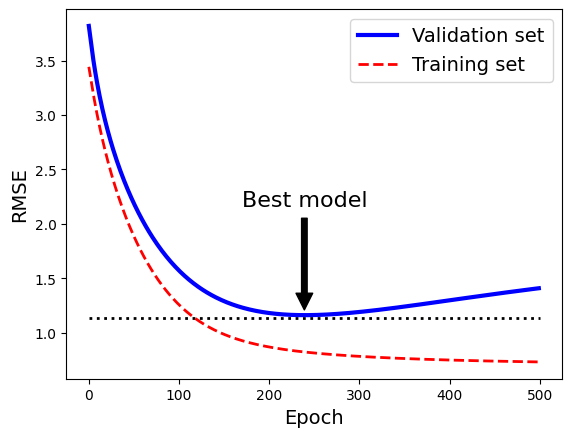

In [50]:
from copy import deepcopy
# 因為會印出一大堆 ConvergenceWarning, 告訴你目前epoch還沒有收斂, 所以先把他註銷掉, 讓output整潔一些 
from warnings import simplefilter
from sklearn.exceptions import ConvergenceWarning
simplefilter("ignore", category=ConvergenceWarning)

np.random.seed(42)
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 2 + X + 0.5 * X**2 + np.random.randn(m, 1)

X_train, X_val, y_train, y_val = train_test_split(X[:50], y[:50].ravel(), test_size=0.5, random_state=10)

poly_scaler = Pipeline([
        ("poly_features", PolynomialFeatures(degree=90, include_bias=False)),
        ("std_scaler", StandardScaler())
    ])

X_train_poly_scaled = poly_scaler.fit_transform(X_train)
X_val_poly_scaled = poly_scaler.transform(X_val)

# warm_start: True, 代表從之前停止的地方繼續 fit; False 則會從頭來過 (default=False)
sgd_reg = SGDRegressor(max_iter=1, tol=0.0, warm_start=True,
                       penalty=None, learning_rate="constant", eta0=0.0005, random_state=42)

minimum_val_error = float("inf")
best_epoch = None
best_model = None
for epoch in range(1000):
    sgd_reg.fit(X_train_poly_scaled, y_train)                   # 在之前停止的地方繼續
    y_val_predict = sgd_reg.predict(X_val_poly_scaled)
    val_error = mean_squared_error(y_val, y_val_predict)
    if val_error < minimum_val_error:                           # 若目前 model 的誤差更小, 就更新 best_model
        minimum_val_error = val_error
        best_epoch = epoch
        best_model = deepcopy(sgd_reg)

sgd_reg = SGDRegressor(max_iter=1, tol=0.0, warm_start=True,
                       penalty=None, learning_rate="constant", eta0=0.0005, random_state=42)

n_epochs = 500
train_errors, val_errors = [], []
for epoch in range(n_epochs):
    sgd_reg.fit(X_train_poly_scaled, y_train)
    y_train_predict = sgd_reg.predict(X_train_poly_scaled)
    y_val_predict = sgd_reg.predict(X_val_poly_scaled)
    train_errors.append(mean_squared_error(y_train, y_train_predict))
    val_errors.append(mean_squared_error(y_val, y_val_predict))

best_epoch = np.argmin(val_errors)
best_val_rmse = np.sqrt(val_errors[best_epoch])

plt.annotate('Best model',
             xy=(best_epoch, best_val_rmse),
             xytext=(best_epoch, best_val_rmse + 1),
             ha="center",
             arrowprops=dict(facecolor='black', shrink=0.05),
             fontsize=16,
            )

print("Best model happened when epoch =", best_epoch, ", with RMSE =", best_val_rmse)

best_val_rmse -= 0.03
plt.plot([0, n_epochs], [best_val_rmse, best_val_rmse], "k:", linewidth=2)
plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="Validation set")
plt.plot(np.sqrt(train_errors), "r--", linewidth=2, label="Training set")
plt.legend(loc="upper right", fontsize=14)
plt.xlabel("Epoch", fontsize=14)
plt.ylabel("RMSE", fontsize=14)
plt.show()

# 下圖中可以看到, 當 validation set 的誤差開始上升時就應該要停止 training, 以避免 overfitting, 故需要執行 early stopping

# Logistic Regression (邏輯回歸)

與Linear Regression直接輸出結果不同, Logistic Regression 會計算某一實例屬於特定類別的"機率", 若機率大於50%, 則該類別被標註為1, 若否則0

Logistic回歸模型估計的機率 p = hθ(x) = σ(x^T ⋅ θ), 而 σ(⋅) 是 sigmoid函數, 輸出值介於 0 和 1 之間

所以 y = 1 if (p >= 0.5), else 0

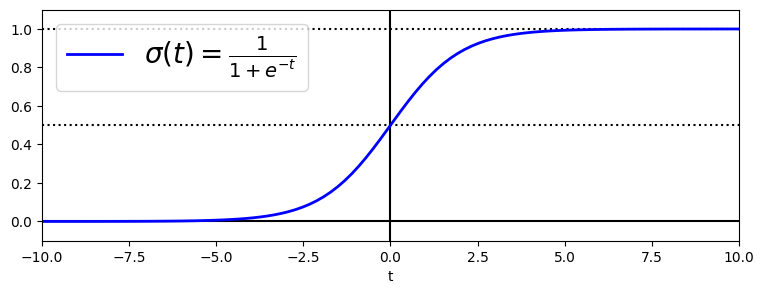

In [51]:
# Sigmoid function
t = np.linspace(-10, 10, 100)
sig = 1 / (1 + np.exp(-t))
plt.figure(figsize=(9, 3))
plt.plot([-10, 10], [0, 0], "k-")
plt.plot([-10, 10], [0.5, 0.5], "k:")
plt.plot([-10, 10], [1, 1], "k:")
plt.plot([0, 0], [-1.1, 1.1], "k-")
plt.plot(t, sig, "b-", linewidth=2, label=r"$\sigma(t) = \frac{1}{1 + e^{-t}}$")
plt.xlabel("t")
plt.legend(loc="upper left", fontsize=20)
plt.axis([-10, 10, -0.1, 1.1])
plt.show()

# 範例

In [56]:
from sklearn import datasets
iris = datasets.load_iris()
print("keys: ", list(iris.keys()))
print(iris.DESCR)

# X 代表花瓣的寬度 (petal width)
# y=1 代表是 Iris virginica, y=0 代表不是
X = iris["data"][:, 3:]                          # X.shape = (150, 1)
y = (iris["target"] == 2).astype(np.int32)       # y.shape = (150, )

keys:  ['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module']
.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal wi

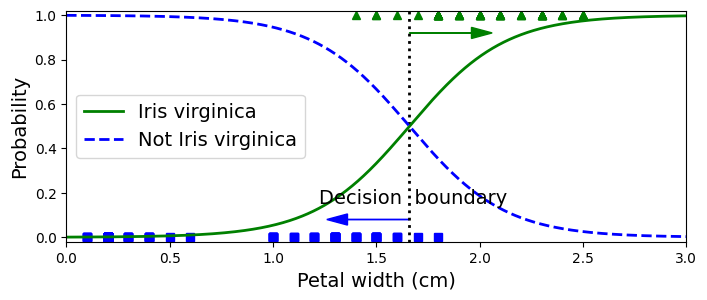

Decision Boundary =  [1.66066066]
Therefore, the prediction of [1.5] = [0] , and [1.7] = [1]


In [63]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(solver="lbfgs", random_state=42)
log_reg.fit(X, y)

# np.linspace(a, b, c): 在 a 與 b 之間 放入 c 個點 (第一個點是a, 最後的點是b)
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)
decision_boundary = X_new[y_proba[:, 1] >= 0.5][0]

plt.figure(figsize=(8, 3))
# 藍色方形, 代表 非Iris virginica 的花瓣寬度
plt.plot(X[y==0], y[y==0], "bs")
# 綠色三角, 代表 Iris virginica 的花瓣寬度
plt.plot(X[y==1], y[y==1], "g^")
plt.plot([decision_boundary, decision_boundary], [-1, 2], "k:", linewidth=2)
plt.plot(X_new, y_proba[:, 1], "g-", linewidth=2, label="Iris virginica")
plt.plot(X_new, y_proba[:, 0], "b--", linewidth=2, label="Not Iris virginica")
plt.text(decision_boundary+0.02, 0.15, "Decision  boundary", fontsize=14, color="k", ha="center")
plt.arrow(decision_boundary[0], 0.08, -0.3, 0, head_width=0.05, head_length=0.1, fc='b', ec='b')
plt.arrow(decision_boundary[0], 0.92, 0.3, 0, head_width=0.05, head_length=0.1, fc='g', ec='g')
plt.xlabel("Petal width (cm)", fontsize=14)
plt.ylabel("Probability", fontsize=14)
plt.legend(loc="center left", fontsize=14)
plt.axis([0, 3, -0.02, 1.02])
plt.show()

print("Decision Boundary = ", decision_boundary)
print("Therefore, the prediction of [1.5] =", log_reg.predict([[1.5]]), ", and [1.7] =", log_reg.predict([[1.7]]))

# 由下圖可以看出, 當花瓣寬度愈長時, Iris virginica 的機率愈高
# 在決策邊界(decision boundary)時, 兩者機率皆為50%, 也就是當花瓣長度大於決策邊界時, 模型會預測它屬於 Iris virginica

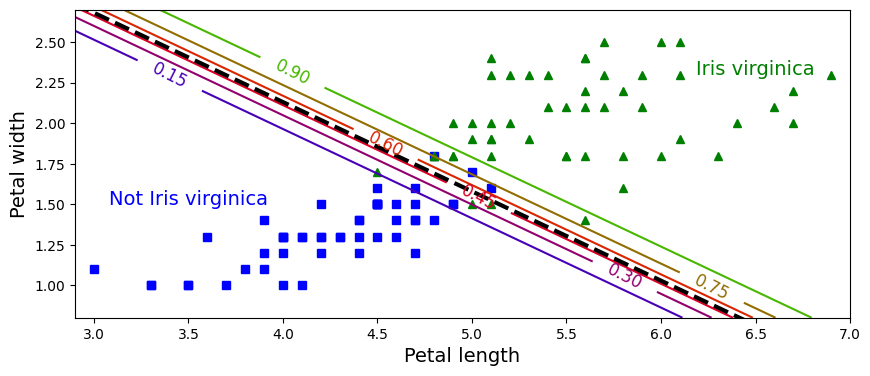

In [65]:
# 除了花瓣寬度以外, 再多觀察花瓣長度與其之間的關係
from sklearn.linear_model import LogisticRegression

X = iris["data"][:, (2, 3)]  # petal length, petal width
y = (iris["target"] == 2).astype(np.int32)

log_reg = LogisticRegression(solver="lbfgs", C=10**10, random_state=42)
log_reg.fit(X, y)

x0, x1 = np.meshgrid(
        np.linspace(2.9, 7, 500).reshape(-1, 1),
        np.linspace(0.8, 2.7, 200).reshape(-1, 1),
    )
X_new = np.c_[x0.ravel(), x1.ravel()]

y_proba = log_reg.predict_proba(X_new)

plt.figure(figsize=(10, 4))
plt.plot(X[y==0, 0], X[y==0, 1], "bs")
plt.plot(X[y==1, 0], X[y==1, 1], "g^")

zz = y_proba[:, 1].reshape(x0.shape)
contour = plt.contour(x0, x1, zz, cmap=plt.cm.brg)


left_right = np.array([2.9, 7])
boundary = -(log_reg.coef_[0][0] * left_right + log_reg.intercept_[0]) / log_reg.coef_[0][1]

plt.clabel(contour, inline=1, fontsize=12)
plt.plot(left_right, boundary, "k--", linewidth=3)
plt.text(3.5, 1.5, "Not Iris virginica", fontsize=14, color="b", ha="center")
plt.text(6.5, 2.3, "Iris virginica", fontsize=14, color="g", ha="center")
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.axis([2.9, 7, 0.8, 2.7])
plt.show()

# 下圖中的線, 代表預測機率為特定值的邊界

# Softmax Regression (Softmax回歸, 即 多項式Logistic回歸)

Logistic Regression 適合二元分類問題, 而 Softmax Regression 適合多元分類

Softmax Regression 會將實例對每一個類別計算出分數, 在對這些分數套用softmax函數(normalized exponential, 正規化指數)來計算各類別的機率

也就是 s_k(x) = x^T ⋅ θ_k (每個類別k都會有自己的參數向量θ), 再得 p(x) = exp(s_k(x)) / Σ exp(s(x))

在預測方面, 會輸出p(x)最高的類別 (單一輸出)

# Cross-Entrophy (交叉熵)

Entropy: 代表不確定性, 也就是結果的多樣性/可能性, 以 Σ - p_i * log_2(p_i) 表示, 例如：
* 假設 A類別機率為0.7, B類別機率為0.2, C類別機率為0.1, 則 entrophy = - 0.7 * log(0.7) - 0.2 * log(0.2) - 0.1 * log(0.1) = 1.154
* 假設 A類別機率為0.3, B類別機率為0.3, C類別機率為0.4, 則 entrophy = - 0.3 * log(0.3) - 0.3 * log(0.3) - 0.4 * log(0.4) = 1.571
* 也就是, 結果的多樣性/可能性愈多者, entrophy 也會愈高

Cross-Entrophy: 觀測預測的機率分佈與實際機率分布的誤差範圍, 若預測值與實際值差越多，不確定性越多，Cross-entropy 也就會越高

Cross-Entrophy 的代價函數 J(θ) = (-1/m) * Σ_m * Σ_k (y_k * log(p_k)), y_k 是 0 或 １ (預測是否屬於該類別)

In [68]:
X = iris["data"][:, (2, 3)]        # 花瓣長度, 花瓣寬度
y = iris["target"]

# multinomial 代表用 softmax regression, C 控制 l2 norm 程度
softmax_reg = LogisticRegression(multi_class="multinomial",solver="lbfgs", C=10, random_state=42)
softmax_reg.fit(X, y)

print("When (petal length, petal width) = (5, 2):")
print("Predicted probability =", softmax_reg.predict_proba([[5, 2]]))
print("Prediction: ", softmax_reg.predict([[5, 2]]))


When (petal length, petal width) = (5, 2):
Predicted probability = [[6.38014896e-07 5.74929995e-02 9.42506362e-01]]
Prediction:  [2]


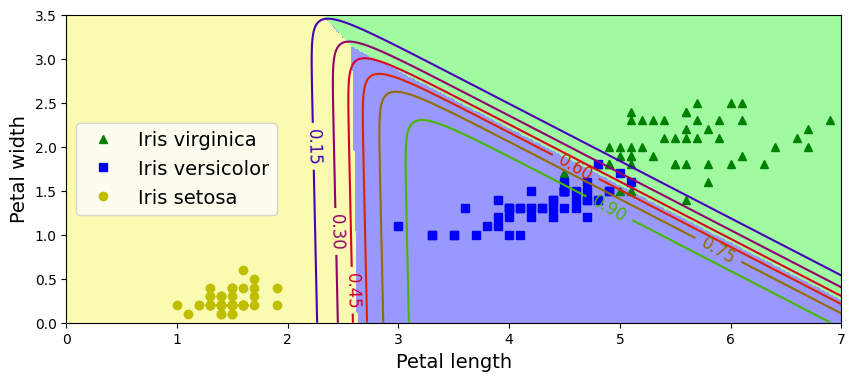

In [70]:
# 畫出三種類別 與 花瓣長度/寬度 的 decision boundary
x0, x1 = np.meshgrid(
        np.linspace(0, 8, 500).reshape(-1, 1),
        np.linspace(0, 3.5, 200).reshape(-1, 1),
    )
X_new = np.c_[x0.ravel(), x1.ravel()]


y_proba = softmax_reg.predict_proba(X_new)
y_predict = softmax_reg.predict(X_new)

zz1 = y_proba[:, 1].reshape(x0.shape)
zz = y_predict.reshape(x0.shape)

plt.figure(figsize=(10, 4))
plt.plot(X[y==2, 0], X[y==2, 1], "g^", label="Iris virginica")
plt.plot(X[y==1, 0], X[y==1, 1], "bs", label="Iris versicolor")
plt.plot(X[y==0, 0], X[y==0, 1], "yo", label="Iris setosa")

from matplotlib.colors import ListedColormap
custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])

plt.contourf(x0, x1, zz, cmap=custom_cmap)
contour = plt.contour(x0, x1, zz1, cmap=plt.cm.brg)
plt.clabel(contour, inline=1, fontsize=12)
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="center left", fontsize=14)
plt.axis([0, 7, 0, 3.5])
plt.show()